In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Finding null values**

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.TotalCharges.dtype

dtype('O')

In [10]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [11]:
#Replacing  " ", with  'nan'
df['TotalCharges']=df['TotalCharges'].str.replace(" ",str(np.nan))

In [12]:
df['TotalCharges'].value_counts()

nan       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
df.TotalCharges.median()

1397.475

In [14]:
df['TotalCharges']=df['TotalCharges'].replace('nan',df['TotalCharges'].median())

In [15]:
df.TotalCharges.isnull().sum()

0

**Converting dtype of the column**

In [16]:
df['TotalCharges']=df.TotalCharges.astype(float)

In [17]:
df['SeniorCitizen']=df.SeniorCitizen.astype(object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Machine Learning Problem

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Target Variable : Churn
* Type : Supervised
* Task : Classification

In [21]:
y = df['Churn']
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [22]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [23]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

**Split the dataset into Training and Testing**

In [24]:
#split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [25]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


**Data preparation on train data**

In [27]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [28]:
X_train.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [29]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [30]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num

,tenure,MonthlyCharges,TotalCharges
6630,16,78.75,1218.25
7013,40,93.40,3756.40
2224,17,76.45,1233.40
6580,49,78.00,3824.20
1501,13,19.95,243.65
...,...,...,...
79,45,25.90,1216.60
3927,3,20.55,51.15
5955,72,68.40,4855.35
6936,5,80.15,385.00


**Applying Standardization to the Numerical columns**

In [31]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
6630,-0.669552,0.471732,-0.471643
7013,0.305416,0.957819,0.649818
2224,-0.628928,0.395418,-0.464949
6580,0.671028,0.446847,0.679775
1501,-0.791422,-1.479251,-0.902262


In [32]:
print("Number of Numerical Features:",scaler.n_features_in_)
print("mean of each column:",scaler.mean_)
print("Std of each column:",np.sqrt(scaler.var_))

Number of Numerical Features: 3
mean of each column: [  32.48182507   64.53262969 2285.6977092 ]
Std of each column: [  24.61621647   30.13864334 2263.25331323]


In [33]:
X_train_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000
mean,32.481825,64.532630,2285.697709
std,24.618547,30.141497,2263.467586
min,0.000000,18.250000,18.800000
25%,9.000000,35.062500,402.662500
50%,29.000000,70.250000,1397.475000
75%,56.000000,89.700000,3808.150000
max,72.000000,118.650000,8670.100000


**Applying OneHotEncoding to the Categorical Columns**

In [34]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [35]:
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
3927,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
5955,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic)
6936,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check


In [36]:
X_train_cat['SeniorCitizen'].value_counts(normalize=True)

0    0.839833
1    0.160167
Name: SeniorCitizen, dtype: float64

In [37]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.522151
Yes    0.477849
Name: Partner, dtype: float64

In [38]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.695759
Yes    0.304241
Name: Dependents, dtype: float64

In [39]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.903824
No     0.096176
Name: PhoneService, dtype: float64

In [40]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.485612
Yes                 0.418213
No phone service    0.096176
Name: MultipleLines, dtype: float64

In [41]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.434495
DSL            0.343052
No             0.222454
Name: InternetService, dtype: float64

In [42]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.489587
Yes                    0.287959
No internet service    0.222454
Name: OnlineSecurity, dtype: float64

In [43]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.430708
Yes                    0.346838
No internet service    0.222454
Name: OnlineBackup, dtype: float64

In [44]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.432601
Yes                    0.344945
No internet service    0.222454
Name: DeviceProtection, dtype: float64

In [45]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.485233
Yes                    0.292314
No internet service    0.222454
Name: TechSupport, dtype: float64

In [46]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.393033
Yes                    0.384513
No internet service    0.222454
Name: StreamingTV, dtype: float64

In [47]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.542976
Two year          0.246119
One year          0.210905
Name: Contract, dtype: float64

In [48]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.593147
No     0.406853
Name: PaperlessBilling, dtype: float64

In [49]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.334154
Mailed check                 0.229648
Bank transfer (automatic)    0.219614
Credit card (automatic)      0.216585
Name: PaymentMethod, dtype: float64

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,SeniorCitizen_infrequent_sklearn,Dependents_infrequent_sklearn,PhoneService_infrequent_sklearn,PaperlessBilling_infrequent_sklearn
6630,1.0,0.0,0.0,0.0
7013,0.0,0.0,0.0,0.0
2224,1.0,0.0,0.0,0.0
6580,0.0,1.0,0.0,1.0
1501,0.0,0.0,0.0,1.0


In [51]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array([0, 1], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [52]:
encoder_.infrequent_categories_

[array(['Female', 'Male'], dtype=object),
 array([1], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Yes'], dtype=object),
 array(['No'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [53]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_infrequent_sklearn,Dependents_infrequent_sklearn,PhoneService_infrequent_sklearn,PaperlessBilling_infrequent_sklearn
6630,-0.669552,0.471732,-0.471643,1.0,0.0,0.0,0.0
7013,0.305416,0.957819,0.649818,0.0,0.0,0.0,0.0
2224,-0.628928,0.395418,-0.464949,1.0,0.0,0.0,0.0
6580,0.671028,0.446847,0.679775,0.0,1.0,0.0,1.0
1501,-0.791422,-1.479251,-0.902262,0.0,0.0,0.0,1.0


In [54]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4880 to 3368
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   object 
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   objec

**X_test_cat columns**

In [56]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4880,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1541,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5745,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4873,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


**X_test_num columns**

In [57]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
4880,50,20.55,1067.65
1541,72,19.85,1434.10
1289,63,68.80,4111.35
5745,61,24.20,1445.20
4873,7,19.30,144.95


**Scaling the Numerical features**

In [58]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                  columns=X_test_num.columns,
                                  index=X_test_num.index)
X_test_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
4880,0.711652,-1.459343,-0.538184
1541,1.605372,-1.482569,-0.376271
1289,1.239759,0.141591,0.806650
5745,1.158512,-1.338236,-0.371367
4873,-1.035164,-1.500818,-0.945872


**`Applying OneHotEncoding for categorical columns`**

In [59]:
from sklearn.preprocessing import OneHotEncoder

X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,SeniorCitizen_infrequent_sklearn,Dependents_infrequent_sklearn,PhoneService_infrequent_sklearn,PaperlessBilling_infrequent_sklearn
4880,0.0,0.0,0.0,1.0
1541,0.0,0.0,0.0,1.0
1289,0.0,0.0,0.0,1.0
5745,0.0,1.0,0.0,0.0
4873,0.0,0.0,0.0,1.0


In [60]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_infrequent_sklearn,Dependents_infrequent_sklearn,PhoneService_infrequent_sklearn,PaperlessBilling_infrequent_sklearn
4880,0.711652,-1.459343,-0.538184,0.0,0.0,0.0,1.0
1541,1.605372,-1.482569,-0.376271,0.0,0.0,0.0,1.0
1289,1.239759,0.141591,0.806650,0.0,0.0,0.0,1.0
5745,1.158512,-1.338236,-0.371367,0.0,1.0,0.0,0.0
4873,-1.035164,-1.500818,-0.945872,0.0,0.0,0.0,1.0


**KNN Classifier**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [62]:
y_test_pred = classifier.predict(X_test_transformed)

In [63]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

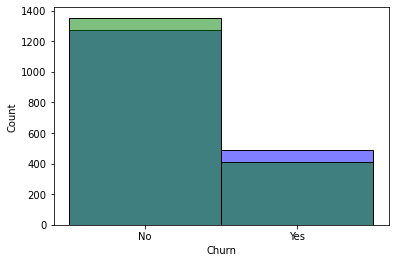

In [64]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

In [65]:
accuracy = metrics.accuracy_score(y_test,y_test_pred)
accuracy

0.7529812606473595

**Decision Tree classifier**

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [67]:
y_test_pred = classifier.predict(X_test_transformed)

In [68]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

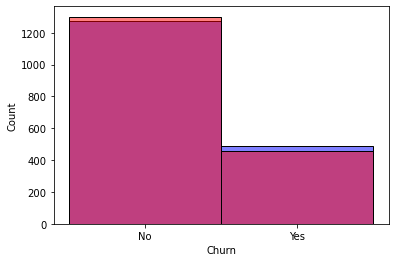

In [69]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [70]:
accuracy = metrics.accuracy_score(y_test,y_test_pred)
accuracy

0.7211811470755253

**Random ForestClassifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [72]:
y_test_pred = classifier.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

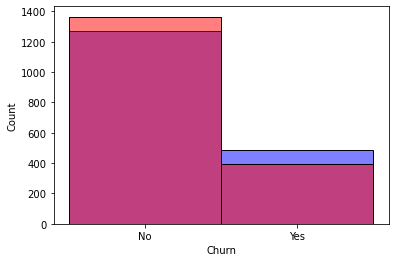

In [74]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [75]:
accuracy = metrics.accuracy_score(y_test,y_test_pred)
accuracy

0.7541169789892107

**LogisticRegression**

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [77]:
y_test_pred = classifier.predict(X_test_transformed)

In [78]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

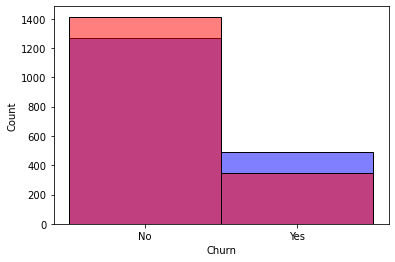

In [79]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [80]:
accuracy = metrics.accuracy_score(y_test,y_test_pred)
accuracy

0.7762634866553095

**Support Vector Machines**

In [81]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [82]:
y_test_pred = classifier.predict(X_test_transformed)

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

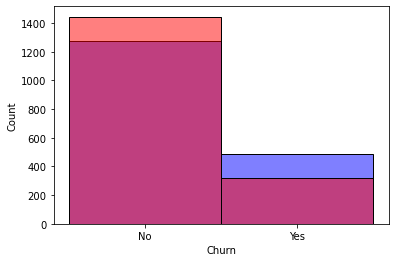

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [85]:
accuracy = metrics.accuracy_score(y_test,y_test_pred)
accuracy

0.7808063600227144

**Best Algorthim :  Support vector machine**